In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv(r'.\Heart disease data\heart.csv')
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

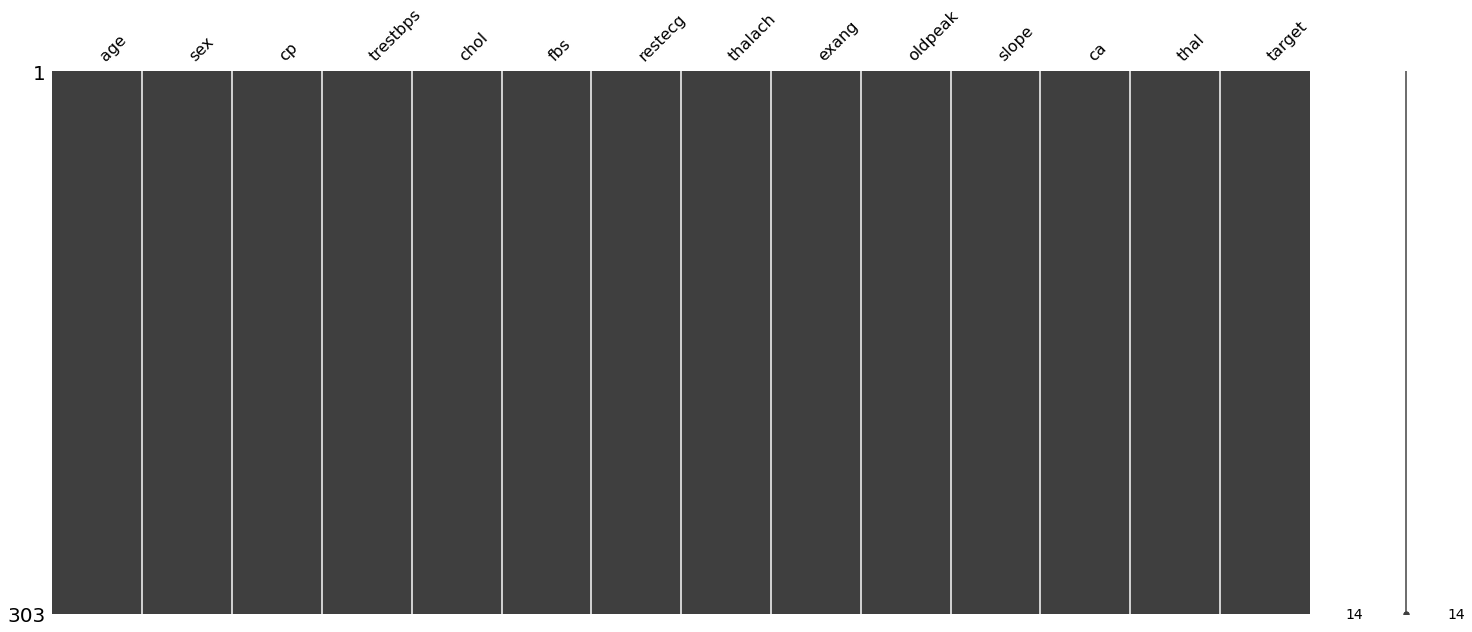

In [3]:
import missingno as msno
msno.matrix(dataframe)

In [4]:
dataframe.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = dataframe.drop(columns=['target'])
y = dataframe['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

In [6]:
def model_eval(model, title):
    prediction_training = model.predict(X_train) 
    
    print(f'{title} results on training data:')
    print(f'Accuracy point: {accuracy_score(y_train, prediction_training)}')
    print(f'Confusion matrix: \n{confusion_matrix(y_train, prediction_training)}')
    print(f'Classification report: \n{classification_report(y_train, prediction_training)}')
    
    prediction_testing = model.predict(X_test)
    
    print(f'{title} results on testing data:')
    print(f'Accuracy point: {accuracy_score(y_test, prediction_testing)}')
    print(f'Classification report: \n{classification_report(y_test, prediction_testing)}')
    
    sns.heatmap(confusion_matrix(y_test, prediction_testing) / len(y_test), annot=True, fmt=".1%")

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Decision Tree Classifier results on training data:
Accuracy point: 0.9433962264150944
Confusion matrix: 
[[ 92   5]
 [  7 108]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        97
           1       0.96      0.94      0.95       115

    accuracy                           0.94       212
   macro avg       0.94      0.94      0.94       212
weighted avg       0.94      0.94      0.94       212

Decision Tree Classifier results on testing data:
Accuracy point: 0.7472527472527473
Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.81      0.70      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



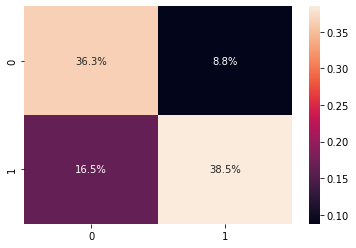

In [8]:
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='random')
model.fit(X_train, y_train)
model_eval(model, 'Decision Tree Classifier')

Random Forest Classifier results on training data:
Accuracy point: 1.0
Confusion matrix: 
[[ 97   0]
 [  0 115]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

Random Forest Classifier results on testing data:
Accuracy point: 0.7912087912087912
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



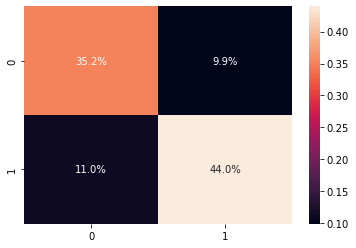

In [9]:
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)
model_eval(model, 'Random Forest Classifier')

Ridge Classifier results on training data:
Accuracy point: 0.8632075471698113
Confusion matrix: 
[[ 77  20]
 [  9 106]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.84      0.92      0.88       115

    accuracy                           0.86       212
   macro avg       0.87      0.86      0.86       212
weighted avg       0.87      0.86      0.86       212

Ridge Classifier results on testing data:
Accuracy point: 0.8021978021978022
Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



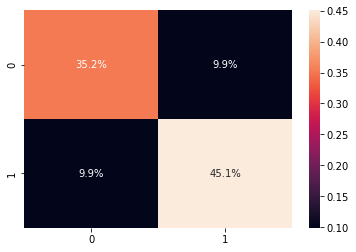

In [10]:
model = RidgeClassifier()
model.fit(X_train, y_train)
model_eval(model, 'Ridge Classifier')

Logistic Regression results on training data:
Accuracy point: 0.8726415094339622
Confusion matrix: 
[[ 79  18]
 [  9 106]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        97
           1       0.85      0.92      0.89       115

    accuracy                           0.87       212
   macro avg       0.88      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212

Logistic Regression results on testing data:
Accuracy point: 0.8131868131868132
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



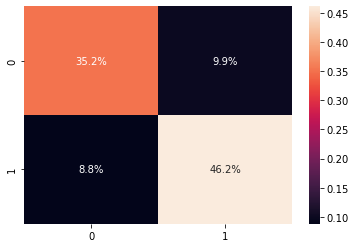

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model_eval(model, 'Logistic Regression')

KNN Classifier results on training data:
Accuracy point: 0.7688679245283019
Confusion matrix: 
[[67 30]
 [19 96]]
Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        97
           1       0.76      0.83      0.80       115

    accuracy                           0.77       212
   macro avg       0.77      0.76      0.76       212
weighted avg       0.77      0.77      0.77       212

KNN Classifier results on testing data:
Accuracy point: 0.6593406593406593
Classification report: 
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.68      0.72      0.70        50

    accuracy                           0.66        91
   macro avg       0.66      0.65      0.65        91
weighted avg       0.66      0.66      0.66        91



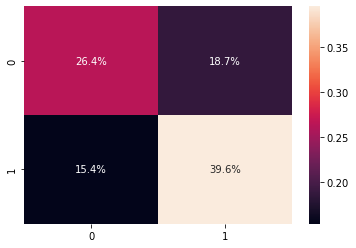

In [12]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model_eval(model, 'KNN Classifier')

SVC results on training data:
Accuracy point: 0.660377358490566
Confusion matrix: 
[[ 40  57]
 [ 15 100]]
Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.41      0.53        97
           1       0.64      0.87      0.74       115

    accuracy                           0.66       212
   macro avg       0.68      0.64      0.63       212
weighted avg       0.68      0.66      0.64       212

SVC results on testing data:
Accuracy point: 0.7032967032967034
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91



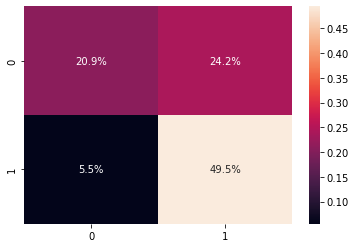

In [13]:
model = SVC()
model.fit(X_train, y_train)
model_eval(model, 'SVC')

GaussianNB results on training data:
Accuracy point: 0.8301886792452831
Confusion matrix: 
[[77 20]
 [16 99]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        97
           1       0.83      0.86      0.85       115

    accuracy                           0.83       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.83      0.83      0.83       212

GaussianNB results on testing data:
Accuracy point: 0.8351648351648352
Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



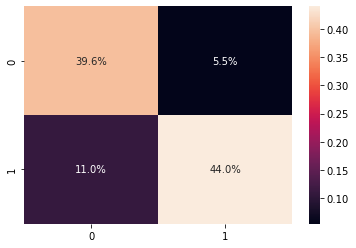

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)
model_eval(model, 'GaussianNB')

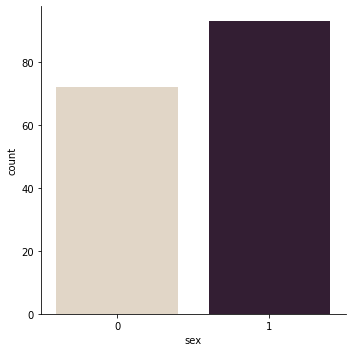

In [15]:
sns.catplot(x='sex', kind='count', data=dataframe[dataframe['target'] == 1], palette="ch:.25")

<AxesSubplot:xlabel='chol', ylabel='age'>

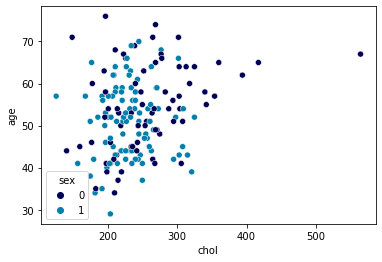

In [16]:
sns.scatterplot(x='chol', y='age', hue='sex', data=dataframe[dataframe['target'] == 1], palette='ocean')

<AxesSubplot:xlabel='chol', ylabel='age'>

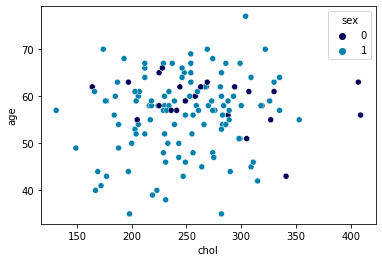

In [17]:
sns.scatterplot(x='chol', y='age', hue='sex', data=dataframe[dataframe['target'] == 0], palette='ocean')

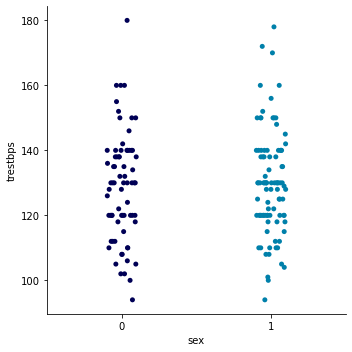

In [18]:
sns.catplot(x='sex', y='trestbps', data=dataframe[dataframe['target'] == 1], palette='ocean')

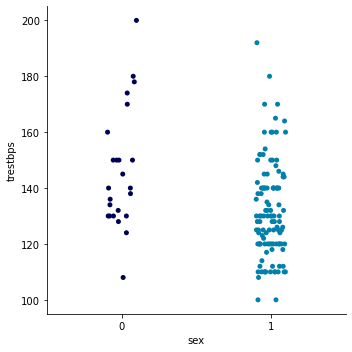

In [19]:
sns.catplot(x='sex', y='trestbps', data=dataframe[dataframe['target'] == 0], palette='ocean')

Results on training data:
Accuracy point: 0.9198113207547169
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        97
           1       0.91      0.95      0.93       115

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212

Results on testing data:
Accuracy point: 0.8351648351648352
Confusion matrix: 
[[31 10]
 [ 5 45]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.82      0.90      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



<AxesSubplot:>

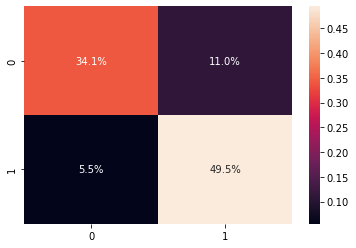

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = SVC()
model.fit(X_train_scaled, y_train)

prediction_training = model.predict(X_train_scaled) 
    
print(f'Results on training data:')
print(f'Accuracy point: {accuracy_score(y_train, prediction_training)}')
print(f'Classification report: \n{classification_report(y_train, prediction_training)}')

prediction_testing = model.predict(X_test_scaled)
print(f'Results on testing data:')
print(f'Accuracy point: {accuracy_score(y_test, prediction_testing)}')
print(f'Classification report: \n{classification_report(y_test, prediction_testing)}')
sns.heatmap(confusion_matrix(y_test, prediction_testing) / len(y_test), annot=True, fmt=".1%")

Results on training data:
Accuracy point: 0.8726415094339622
Confusion matrix: 
[[ 80  17]
 [ 10 105]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        97
           1       0.86      0.91      0.89       115

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212

Results on testing data:
Accuracy point: 0.8351648351648352
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



<AxesSubplot:>

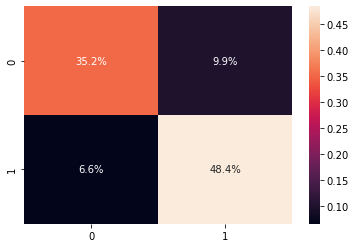

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

prediction_training = model.predict(X_train_scaled) 
    
print(f'Results on training data:')
print(f'Accuracy point: {accuracy_score(y_train, prediction_training)}')
print(f'Confusion matrix: \n{confusion_matrix(y_train, prediction_training)}')
print(f'Classification report: \n{classification_report(y_train, prediction_training)}')

prediction_testing = model.predict(X_test_scaled)

print(f'Results on testing data:')
print(f'Accuracy point: {accuracy_score(y_test, prediction_testing)}')
print(f'Classification report: \n{classification_report(y_test, prediction_testing)}')
sns.heatmap(confusion_matrix(y_test, prediction_testing) / len(y_test), annot=True, fmt=".1%")